## Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [3]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#Importing dataset
media = pd.read_csv('/content/mediacompany.csv')
media = media.drop('Unnamed: 7',axis = 1)

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [27]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [28]:
# Deriving "days since the show started"
from datetime import date

start_time = pd.Timestamp('2017-2-28')

media['day']= (media['Date'] - start_time)

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [29]:
media['day'] = media['day'].astype(str).str[:2].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


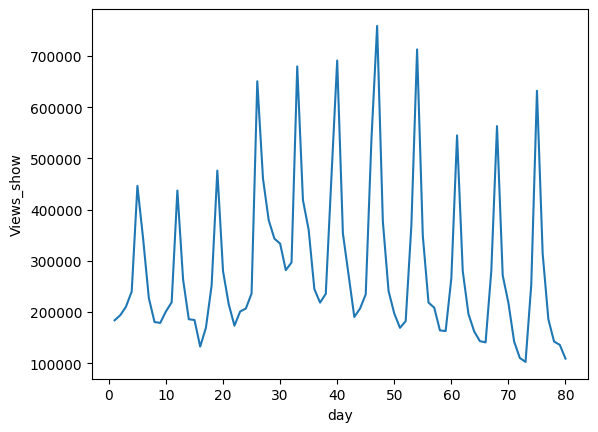

In [30]:
# days vs Views_show

sns.lineplot(data = media, x='day', y='Views_show')
plt.show()

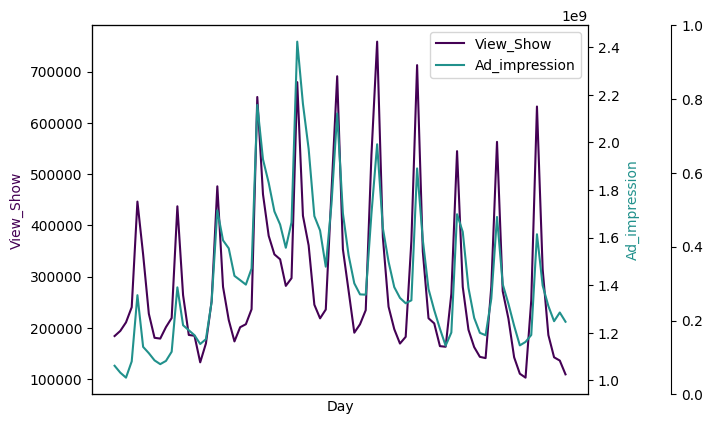

In [31]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
# no x-ticks
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [32]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [33]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day'] + 3) % 7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6


In [34]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2,0
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3,0
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4,0
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5,0
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6,0


#### Rescaling the features using MinMaxScaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_vars = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression', 'day', 'weekday']

media[scale_vars] = scaler.fit_transform(media[scale_vars])

media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,0.000000,0.500000,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,0.012658,0.666667,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,0.025316,0.833333,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,0.037975,1.000000,1
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,0.050633,0.000000,1


#### **Dividing the - X-y sets**

In [40]:
# Putting feature variable to X
X = media.drop(['Date', 'Views_show','day'], axis=1)

# Putting response variable to y
y = media['Views_show']

X.head()

,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday,weekend
0,0.010985,0.011466,0.035372,0,0,0.500000,0
1,0.020409,0.000000,0.014844,0,0,0.666667,0
2,0.000000,0.025792,0.000000,0,0,0.833333,0
3,0.223199,0.119842,0.048345,1,0,1.000000,1
4,0.316041,0.255290,0.245426,0,0,0.000000,1


**Using RFE**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=3).fit(X,y)

list(zip(X.columns,rfe.support_,rfe.ranking_))

[('Visitors', False, 2),
 ('Views_platform', True, 1),
 ('Ad_impression', True, 1),
 ('Cricket_match_india', False, 5),
 ('Character_A', False, 4),
 ('weekday', False, 3),
 ('weekend', True, 1)]

In [42]:
col = X.columns[rfe.support_]
col

Index(['Views_platform', 'Ad_impression', 'weekend'], dtype='object')

In [43]:
import statsmodels.api as sm

X = sm.add_constant(X[col])

lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     101.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.72e-26
Time:                        11:16:22   Log-Likelihood:                 66.848
No. Observations:                  80   AIC:                            -125.7
Df Residuals:                      76   BIC:                            -116.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0114      0.026     -0.

<ipython-input-49-8efbe79e9130>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(media.corr(),annot = True, cmap = 'Greens')


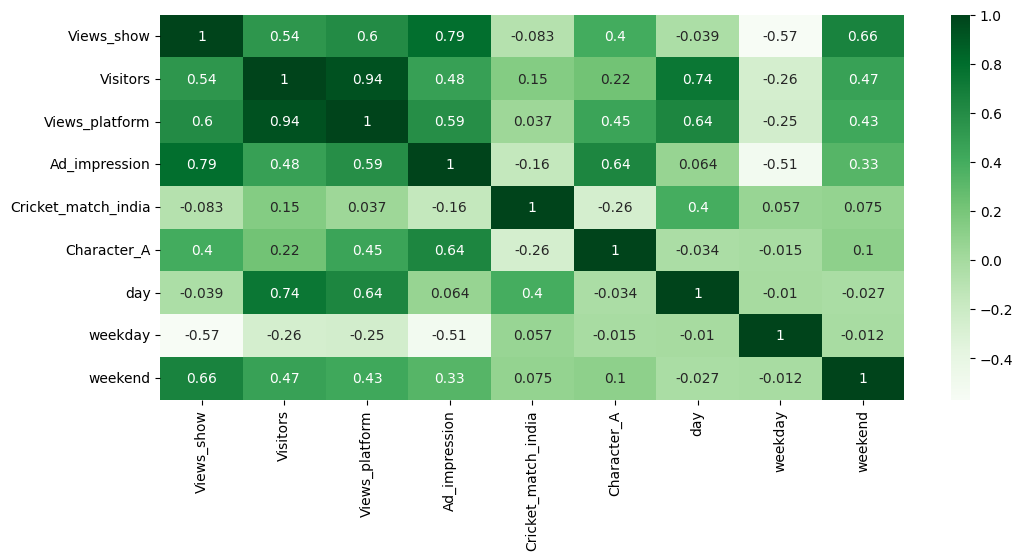

In [49]:
# Checking Correlation

plt.figure(figsize=(12,5))
sns.heatmap(media.corr(),annot = True, cmap = 'Greens')
plt.show()

#### Running second model (lm2) based on correlation

In [64]:
# Putting feature variable to X
X = media[['Visitors','Views_platform', 'Ad_impression', 'Character_A', 'weekend']]

# Putting response variable to y
y = media['Views_show']

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     68.98
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.87e-26
Time:                        11:39:28   Log-Likelihood:                 71.802
No. Observations:                  80   AIC:                            -131.6
Df Residuals:                      74   BIC:                            -117.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0064      0.027      0.

### **Checking VIF**

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Views_platform,16.25
1,Visitors,14.24
0,const,5.54
4,Character_A,2.80
3,Ad_impression,2.21
5,weekend,1.33


***Therefore, we need to drop high VIF Columns one by one***

In [66]:
# Putting feature variable to X
X_lm3 = media[['Visitors', 'Ad_impression', 'Character_A', 'weekend']]

X = sm.add_constant(X_lm3)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.10e-25
Time:                        11:39:36   Log-Likelihood:                 67.431
No. Observations:                  80   AIC:                            -124.9
Df Residuals:                      75   BIC:                            -113.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0064      0.028     -0.229

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.39
2,Ad_impression,2.21
3,Character_A,1.76
1,Visitors,1.52
4,weekend,1.33


#####Dropping the Items with High VIF and High p

In [71]:
# Dropping the Constant
X_lm4 = media[['Visitors', 'Ad_impression', 'Character_A', 'weekend']]

X = X_lm4

lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:             Views_show   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              220.1
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                    5.80e-41
Time:                        11:43:46   Log-Likelihood:                          67.403
No. Observations:                  80   AIC:                                     -126.8
Df Residuals:                      76   BIC:                                     -117.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

,Features,VIF
1,Ad_impression,6.51
0,Visitors,4.35
2,Character_A,2.82
3,weekend,1.76


##### **Now dropping Visitors**

In [72]:
X_lm5 = X_lm4.drop(['Visitors'], axis=1)

X = X_lm5

lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:             Views_show   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              297.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                    3.18e-42
Time:                        11:44:11   Log-Likelihood:                          67.369
No. Observations:                  80   AIC:                                     -128.7
Df Residuals:                      77   BIC:                                     -121.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

,Features,VIF
0,Ad_impression,3.61
1,Character_A,2.77
2,weekend,1.58


##### **Dropping Character_A due to high p**

In [74]:
X_lm6 = X_lm5.drop(['Character_A'], axis=1)


X = X_lm6
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:             Views_show   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              439.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                    3.57e-43
Time:                        11:45:14   Log-Likelihood:                          66.350
No. Observations:                  80   AIC:                                     -128.7
Df Residuals:                      78   BIC:                                     -123.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

,Features,VIF
0,Ad_impression,1.54
1,weekend,1.54


**This seems to be a good model**


In [96]:
# Checking with const


X = sm.add_constant(X_lm6)
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.95e-27
Time:                        12:26:52   Log-Likelihood:                 66.359
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      77   BIC:                            -119.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0029      0.021      0.136

,Features,VIF
0,const,3.14
1,Ad_impression,1.12
2,weekend,1.12


Since, p value increases drastically in $7th$ model, we consider the previous $6th$ model for making predictions

In [75]:
y_pred = lm_6.predict(X_lm6)

<ipython-input-80-8810ef49bd27>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y - y_pred))


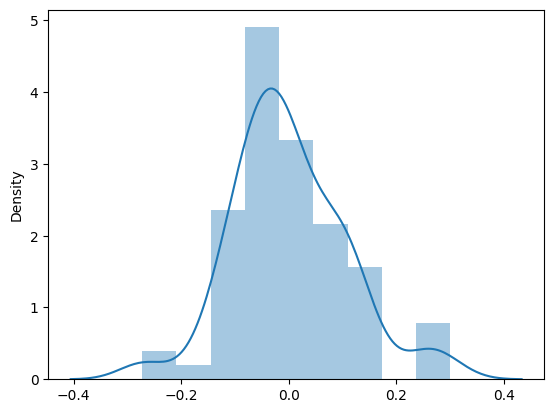

In [80]:
sns.distplot((y - y_pred))
plt.show()

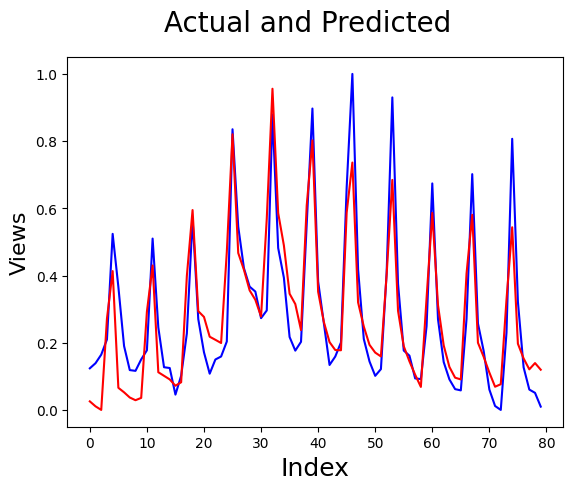

In [89]:
plt.figure()
sns.lineplot(y, color="blue")
sns.lineplot(y_pred, color="red")
plt.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label
plt.show()

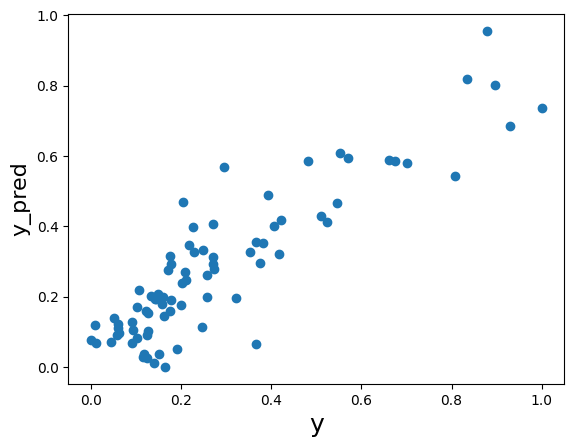

In [94]:
plt.scatter(y,y_pred)
plt.xlabel('y', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
